In [194]:
import csv

rawData = []
with open("cs455_homework3_Maynard_dataset.csv" ,'r') as csvFile:
    next(csvFile)
    for line in csvFile:
        rawData.append(line.strip().split(','))
    csvFile.close()
    
print(rawData)

[['1', '2003', '250'], ['2', '2005', '247.5'], ['3', '2014', '224'], ['4', '2013', '200'], ['5', '2015', '174.1'], ['6', '2013', '164.5'], ['7', '1999', '161'], ['8', '2016', '159.9'], ['9', '2019', '159.2'], ['10', '2018', '151.1'], ['11', '2003', '150'], ['12', '2007', '150'], ['13', '2009', '150'], ['14', '2009', '150'], ['15', '2012', '146.2'], ['16', '2004', '135'], ['17', '2004', '130'], ['18', '2005', '130'], ['19', '2000', '126'], ['20', '2017', '124.7'], ['21', '2020', '100'], ['22', '2007', '100'], ['23', '2010', '100'], ['24', '2004', '75'], ['25', '2012', '70'], ['26', '2013', '70'], ['27', '2007', '65'], ['28', '2017', '63'], ['29', '2011', '60'], ['30', '1996', '60'], ['31', '2003', '60'], ['32', '2005', '60'], ['33', '2016', '55'], ['34', '2003', '50'], ['35', '2004', '50'], ['36', '2010', '50'], ['37', '2006', '47'], ['38', '2015', '45'], ['39', '2005', '45'], ['40', '2017', '41'], ['41', '2011', '40'], ['42', '2019', '37'], ['43', '2018', '35.4'], ['44', '2004', '35'],

In [195]:
yearData = [int(i[1]) for i in rawData]
soldData = [float(i[2]) for i in rawData]

def normalizeData(data):
    newData = []
    for i in range(len(data)):
        newValue = (data[i] - min(data))/ (max(data) - min(data))*100
        newData.append(round(newValue,3))
    return newData

normYearData = normalizeData(yearData)
#print(normYearData)
#print("--------")

normSoldData = normalizeData(soldData)
#print(normSoldData)

pairedData = []
for i,j in zip(normYearData,normSoldData):
    newPair = [i,j] 
    pairedData.append(newPair)
    
print(pairedData)

[[26.923, 100.0], [34.615, 98.97], [69.231, 89.287], [65.385, 79.398], [73.077, 68.727], [65.385, 64.771], [11.538, 63.329], [76.923, 62.876], [88.462, 62.588], [84.615, 59.25], [26.923, 58.797], [42.308, 58.797], [50.0, 58.797], [50.0, 58.797], [61.538, 57.231], [30.769, 52.616], [30.769, 50.556], [34.615, 50.556], [15.385, 48.908], [80.769, 48.372], [92.308, 38.195], [42.308, 38.195], [53.846, 38.195], [30.769, 27.895], [61.538, 25.834], [65.385, 25.834], [42.308, 23.774], [80.769, 22.95], [57.692, 21.714], [0.0, 21.714], [26.923, 21.714], [34.615, 21.714], [76.923, 19.654], [26.923, 17.594], [30.769, 17.594], [53.846, 17.594], [38.462, 16.358], [73.077, 15.534], [34.615, 15.534], [80.769, 13.885], [57.692, 13.473], [88.462, 12.237], [84.615, 11.578], [30.769, 11.413], [50.0, 11.413], [84.615, 10.177], [88.462, 9.477], [38.462, 9.353], [46.154, 9.353], [61.538, 9.353], [38.462, 9.353], [88.462, 9.353], [92.308, 8.941], [92.308, 8.529], [53.846, 7.293], [76.923, 6.963], [88.462, 6.963

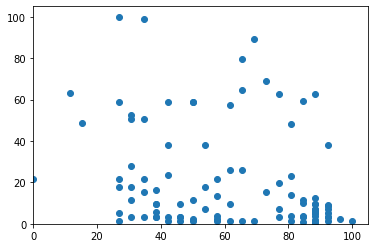

In [196]:
import matplotlib.pyplot as plot
%matplotlib inline
plot.xlim([0,105])
plot.ylim([0,105])

def getX(data):
    r = []
    for i in data:
        r.append(i[0])
    return r
        
def getY(data):
    r = []
    for i in data:
        r.append(i[1])
    return r


X = getX(pairedData)
Y = getY(pairedData)
plot.scatter(X,Y)



In [197]:
import random

centroids = []
for i in range(3):
    centroids.append(pairedData[random.randint(0, 100)])

#centroid1 = pairedData[random.randint(0, 100)]
#centroid2 = pairedData[random.randint(0, 100)]
#centroid3 = pairedData[random.randint(0, 100)]

#print(centroid1, centroid2, centroid3)
print(centroids)

[[92.308, 8.529], [73.077, 68.727], [65.385, 64.771]]


[92.308, 8.529]
[73.077, 68.727]
[65.385, 64.771]


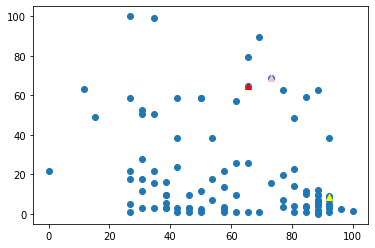

In [198]:
X = getX(pairedData)
Y = getY(pairedData)
plot.scatter(X,Y)

centroidColors = ["yellow","pink","red"]


for i in range(len(centroids)):
    print(centroids[i])
    X = getX([centroids[i]])
    Y = getY([centroids[i]])
    plot.scatter(X,Y,color=centroidColors[i],marker="^")


In [199]:
import math
def distance(p, q):
    return int(math.fabs(p[0] - q[0]) + math.fabs(p[1]-q[1]))

clusters = [[],[],[]]

In [200]:
for i in range(len(pairedData)):
    if distance(pairedData[i],centroids[0])<distance(pairedData[i],centroids[1]) and distance(pairedData[i],centroids[0])<distance(pairedData[i],centroids[2]):
        clusters[0].append(i)
    elif distance(pairedData[i],centroids[1])<distance(pairedData[i],centroids[0]) and distance(pairedData[i],centroids[1])<distance(pairedData[i],centroids[2]):
        clusters[1].append(i)
    else:
        clusters[2].append(i)
        
print(clusters[0])
print(clusters[1])
print(clusters[2])

[20, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[2, 4, 7, 8, 9, 19]
[0, 1, 3, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26]


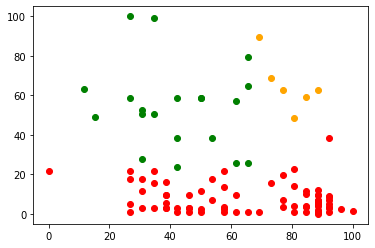

In [201]:
clusterPoints = []
pointColors = ["red","orange","green"]

for i in range(len(clusters)):
    for x in clusters[i]:
        clusterPoints.append(pairedData[x])
        X = getX(clusterPoints)
        Y = getY(clusterPoints)
        plot.scatter(X,Y,color =pointColors[i])
        clusterPoints = []

In [202]:
def SSE(centroid, cluster):
    sum = 0
    for point in cluster:
        dist = distance(centroid, point)
        sum += dist*dist
    return sum

In [203]:
for i in range(len(clusters)):
    clusterPoints = []
    for x in clusters[i]:
        clusterPoints.append(pairedData[x])
    print(SSE(centroids[i],clusterPoints))

124613
2323
43197


In [204]:
def newCentroid(cluster):
    sum_X = 0
    sum_Y = 0
    for i in range(len(cluster)):
        sum_X = pairedData[cluster[i]][0] + sum_X
    for i in range(len(cluster)):
        sum_Y = pairedData[cluster[i]][1] + sum_Y
    return int(sum_X/len(cluster)), int(sum_Y/len(cluster))

In [205]:
oldCentroids = centroids.copy()

for i in range(len(centroids)):
    centroids[i] = newCentroid(clusters[i])

    
print(oldCentroids)
print(centroids)

print(oldCentroids == centroids)

[[92.308, 8.529], [73.077, 68.727], [65.385, 64.771]]
[(65, 7), (78, 65), (42, 54)]
False


In [206]:
clusters = [[],[],[]]

for i in range(len(pairedData)):
    if distance(pairedData[i],centroids[0])<distance(pairedData[i],centroids[1]) and distance(pairedData[i],centroids[0])<distance(pairedData[i],centroids[2]):
        clusters[0].append(i)
    elif distance(pairedData[i],centroids[1])<distance(pairedData[i],centroids[0]) and distance(pairedData[i],centroids[1])<distance(pairedData[i],centroids[2]):
        clusters[1].append(i)
    else:
        clusters[2].append(i)
        

In [207]:
oldCentroids = centroids.copy()

for i in range(len(centroids)):
    centroids[i] = newCentroid(clusters[i])


print(oldCentroids)
print(centroids)

print(oldCentroids == centroids)

[(65, 7), (78, 65), (42, 54)]
[(66, 7), (77, 63), (34, 50)]
False


In [208]:
clusters = [[],[],[]]

for i in range(len(pairedData)):
    if distance(pairedData[i],centroids[0])<distance(pairedData[i],centroids[1]) and distance(pairedData[i],centroids[0])<distance(pairedData[i],centroids[2]):
        clusters[0].append(i)
    elif distance(pairedData[i],centroids[1])<distance(pairedData[i],centroids[0]) and distance(pairedData[i],centroids[1])<distance(pairedData[i],centroids[2]):
        clusters[1].append(i)
    else:
        clusters[2].append(i)
        

In [209]:
oldCentroids = centroids.copy()

for i in range(len(centroids)):
    centroids[i] = newCentroid(clusters[i])


print(oldCentroids)
print(centroids)

print(oldCentroids == centroids)

[(66, 7), (77, 63), (34, 50)]
[(68, 6), (75, 63), (32, 44)]
False


(68, 6)
(75, 63)
(32, 44)


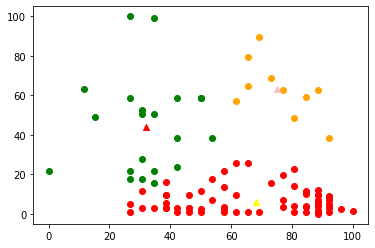

In [210]:
clusterPoints = []
pointColors = ["red","orange","green"]
centroidColors = ["yellow","pink","red"]

for i in range(len(clusters)):
    for x in clusters[i]:
        clusterPoints.append(pairedData[x])
        X = getX(clusterPoints)
        Y = getY(clusterPoints)
        plot.scatter(X,Y,color =pointColors[i])
        clusterPoints = []
        
for i in range(len(centroids)):
    print(centroids[i])
    X = getX([centroids[i]])
    Y = getY([centroids[i]])
    plot.scatter(X,Y,color=centroidColors[i],marker="^")


In [211]:
for i in range(len(clusters)):
    clusterPoints = []
    for x in clusters[i]:
        clusterPoints.append(pairedData[x])
    print(SSE(centroids[i],clusterPoints))

43553
4737
21223
